<a href="https://colab.research.google.com/github/ShreyasJ25/ml/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE LIBRARIES REQUIRED**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dataset Information The data set contains 2 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
class: Iris Versicolour -- Iris Virginica

**Data Collection and processing**

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()


Saving IRIS.csv to IRIS.csv


In [ ]:
import io
 
dataset= pd.read_csv(io.BytesIO(uploaded['IRIS.csv']))
for i in range(0,50):
  dataset = dataset.drop([i])
print(dataset)

      id  sepal_length  sepal_width  petal_length  petal_width     species
50    51           7.0          3.2           4.7          1.4  versicolor
51    52           6.4          3.2           4.5          1.5  versicolor
52    53           6.9          3.1           4.9          1.5  versicolor
53    54           5.5          2.3           4.0          1.3  versicolor
54    55           6.5          2.8           4.6          1.5  versicolor
..   ...           ...          ...           ...          ...         ...
145  146           6.7          3.0           5.2          2.3   virginica
146  147           6.3          2.5           5.0          1.9   virginica
147  148           6.5          3.0           5.2          2.0   virginica
148  149           6.2          3.4           5.4          2.3   virginica
149  150           5.9          3.0           5.1          1.8   virginica

[100 rows x 6 columns]


In [ ]:
dataset.describe()


,id,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,100.500000,6.262000,2.872000,4.906000,1.676000
std,29.011492,0.662834,0.332751,0.825578,0.424769
min,51.000000,4.900000,2.000000,3.000000,1.000000
25%,75.750000,5.800000,2.700000,4.375000,1.300000
50%,100.500000,6.300000,2.900000,4.900000,1.600000
75%,125.250000,6.700000,3.025000,5.525000,2.000000
max,150.000000,7.900000,3.800000,6.900000,2.500000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   sepal_length  100 non-null    float64
 2   sepal_width   100 non-null    float64
 3   petal_length  100 non-null    float64
 4   petal_width   100 non-null    float64
 5   species       100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.5+ KB


In [ ]:
dataset.isnull().sum()

id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
dataset.nunique()


id              100
sepal_length     28
sepal_width      16
petal_length     34
petal_width      16
species           2
dtype: int64

In [ ]:
dataset.species.nunique()

2

In [ ]:
dataset.species.value_counts()

versicolor    50
virginica     50
Name: species, dtype: int64

**Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


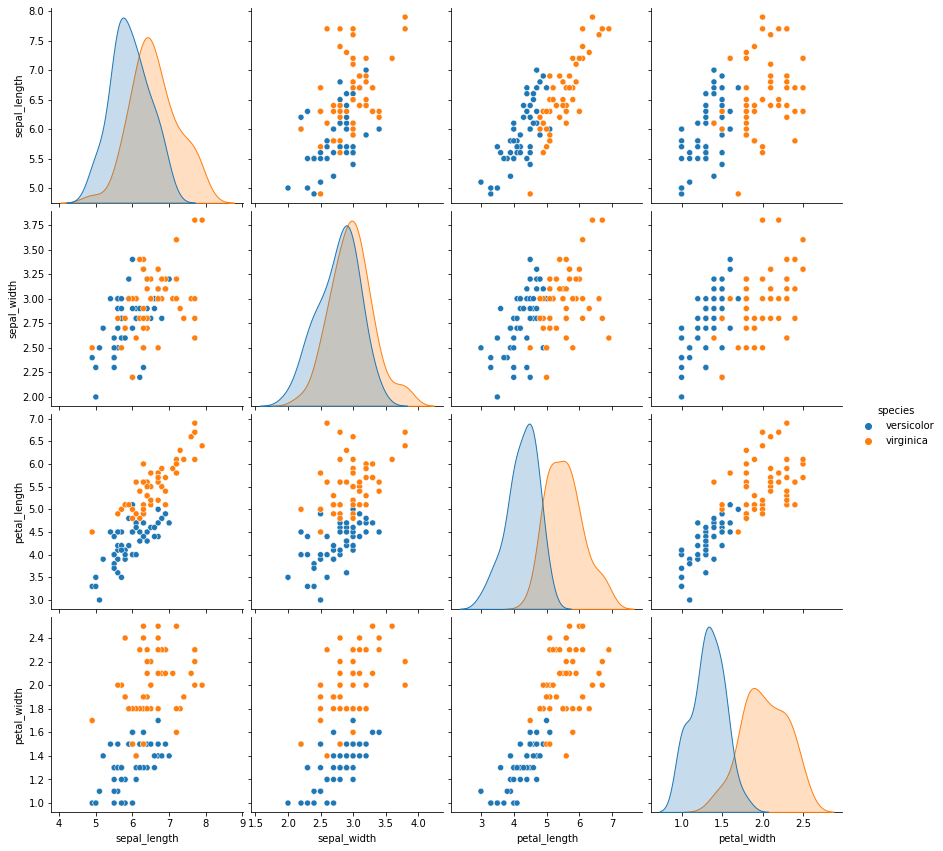

In [ ]:
sns.pairplot(dataset.drop("id", axis=1), hue="species", size=3)
#sns.pairplot(dataset, hue="species")

**Data visulaisation**

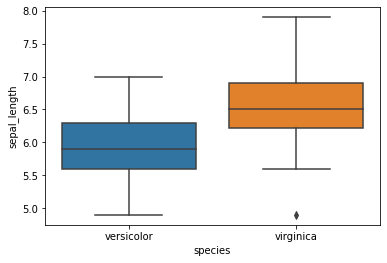

In [ ]:
sns.boxplot(x="species",y="sepal_length",data=dataset)

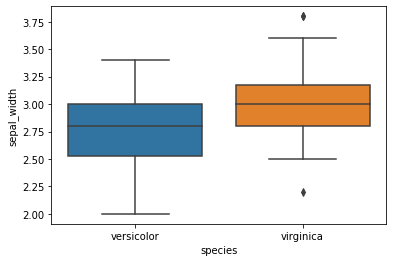

In [ ]:
sns.boxplot(x="species",y="sepal_width",data=dataset)

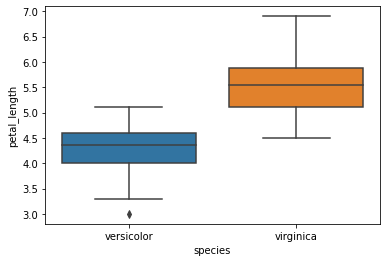

In [ ]:
sns.boxplot(x="species",y="petal_length",data=dataset)

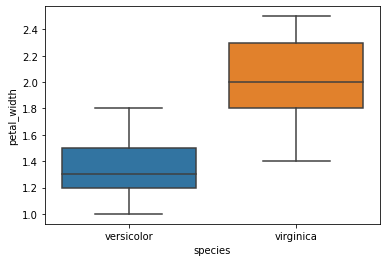

In [ ]:
sns.boxplot(x="species",y="petal_width",data=dataset)

In [ ]:
df = dataset.drop(columns = ['id'])

**Coorelation Matrix**


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.



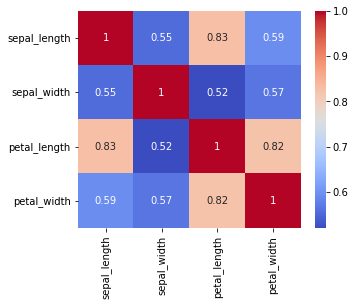

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

**the least corelation is found between sepel_width & petal_length**

hence we select these two features for classification


---



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])   # classifing species as o and 1
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [ ]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width,species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


we delete the colums other than sepal_width and petal_length

In [ ]:
df_n = df.drop(columns = ['sepal_length'])
df_n =df_n.drop(columns = ['petal_width'])

In [ ]:
df_n.describe()
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


**splitting the dataset**

In [ ]:
X = df_n.iloc[:,:-1]
y = df_n.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
#sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     sepal_width  petal_length
98           2.5           3.0
56           3.3           4.7
149          3.0           5.1
132          2.8           5.6
126          2.8           4.8
..           ...           ...
146          2.5           5.0
117          3.8           6.7
114          2.8           5.1
97           2.9           4.3
94           2.7           4.2

[75 rows x 2 columns]
98     0
56     0
149    1
132    1
126    1
      ..
146    1
117    1
114    1
97     0
94     0
Name: species, Length: 75, dtype: int64
     sepal_width  petal_length
76           2.8           4.8
136          3.4           5.6
52           3.1           4.9
105          3.0           6.6
125          3.2           6.0
143          3.2           5.9
66           3.0           4.5
123          2.7           4.9
104          3.0           5.8
145          3.0           5.2
103          2.9           5.6
142          2.7           5.1
128          2.8           5.6
63           2.9           4.7
5

**importing gaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0])

**Generating confusion matrix for the selected feeatures classification**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  2]
 [ 1 11]]


0.88

**model evaluation**

In [ ]:

print('accuracy is',accuracy_score(y_pred,y_test)*100)

accuracy is 88.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1, random_state=42)

scores = cross_val_score(classifier, X, y, cv=5)
scores

array([0.8 , 0.9 , 0.8 , 0.9 , 0.95])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.87 accuracy with a standard deviation of 0.06
